# Credit Card Fraud Detection

此資料為2013年9月某兩天的信用卡交易資料，總交易次數為284,807筆，其中有492筆為詐騙資料。<p>由於非詐騙的資料筆數較多，這筆資料明顯是unbalance data，frauds只佔了全部的0.172%。 <p>
有鑑於保護資料隱私，我們只有28個PCA過後的features以及’Time’和’Amount’。 <p>
Time：每一筆交易與第一筆交易的相差時間(s) <p>
Amount：交易的金額 <p>
Class：Fraud=1, Normal=0

# Load libraries and read data

## Load libraries

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus

## Read data

In [289]:
df = pd.read_csv("D:\\python_practice\\creditcard.csv",header=0)

In [290]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data desciptive

## Data dist.

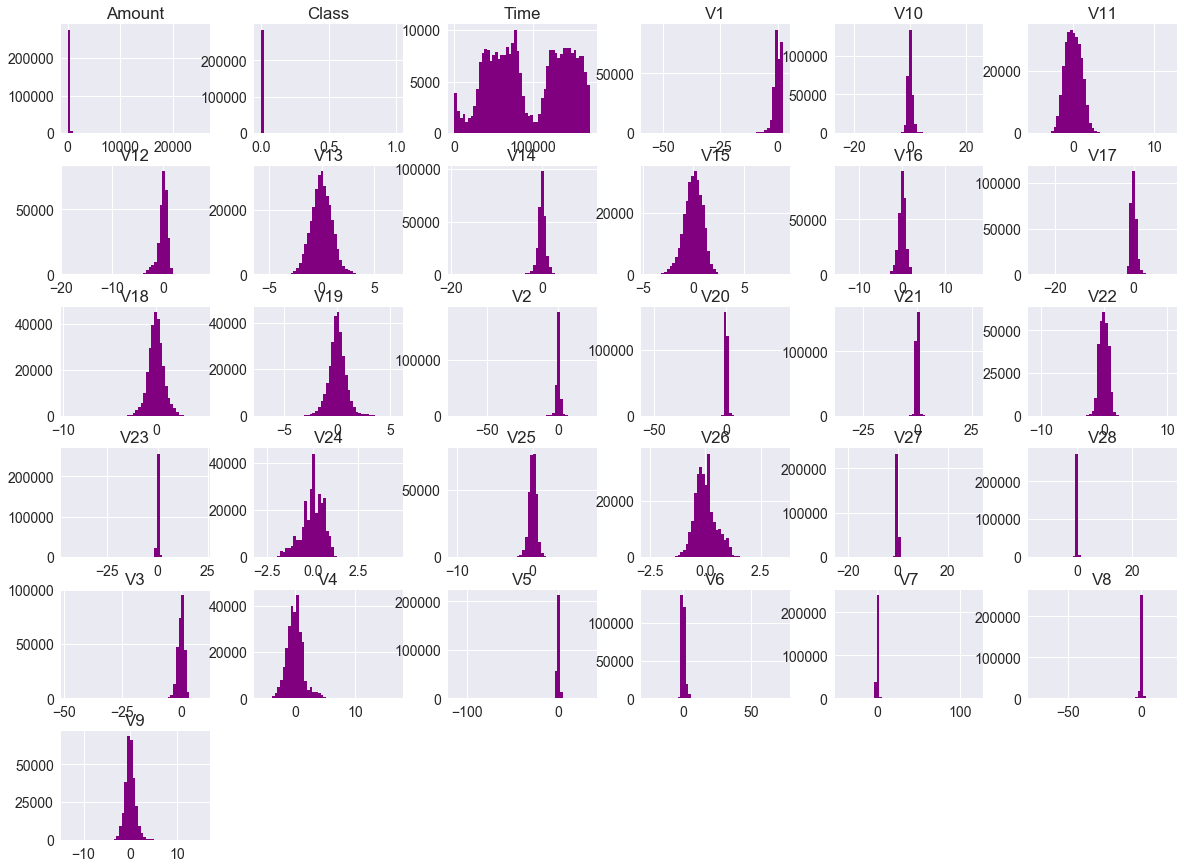

In [291]:
df.hist(bins=50, figsize=(20,15), color = 'purple')
plt.show()

In [292]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [293]:
df.isnull().sum() #確認是否有NA值

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

可以發現資料沒有NA值

## Class dist.

In [294]:
len(df[df['Class']==1])

492

In [295]:
len(df[df['Class']==0])

284315

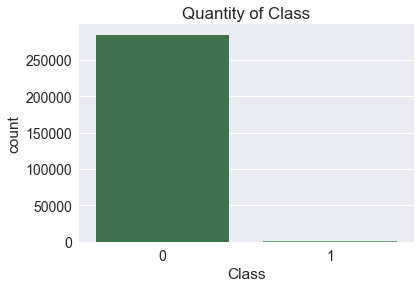

In [296]:
sns.countplot(x="Class", data=df, palette="Greens_d").set_title("Quantity of Class");

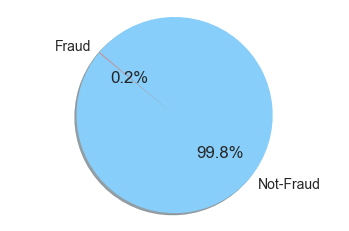

In [297]:
# Data to plot
labels =['Fraud','Not-Fraud']
sizes = [len(df[df['Class']==1]),len(df[df['Class']==0])]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [298]:
len(df[df['Class']==1])/len(df[df['Class']==0])

0.0017304750013189597

## Correlation Matrix
- In fraud class samples, there are some high correlation between each features.

### Class seperated

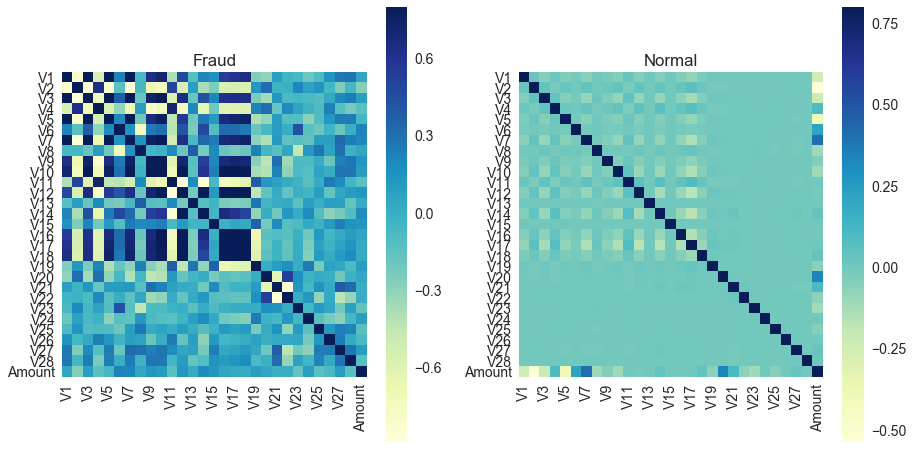

In [299]:
#correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 15, 8))

sns.heatmap(df.query('Class==1').drop(['Class','Time'],1).corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Fraud')

sns.heatmap(df.query('Class==0').drop(['Class','Time'],1).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('Normal')

plt.show()

### Class mixed
- 沒有分類的情況之下，可以發現受到normal的影響，係數之間的correlation不明顯
- 或者是說，因為PCA過後所以選出來的feature之間是獨立的

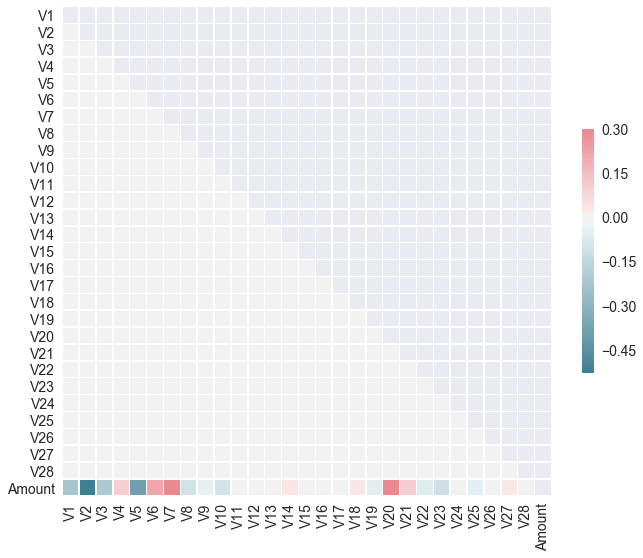

In [300]:
# Compute the correlation matrix
corr = df.drop(['Time','Class'],1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- 放入class一起看時，可以看出有哪些係數跟class相關性較高

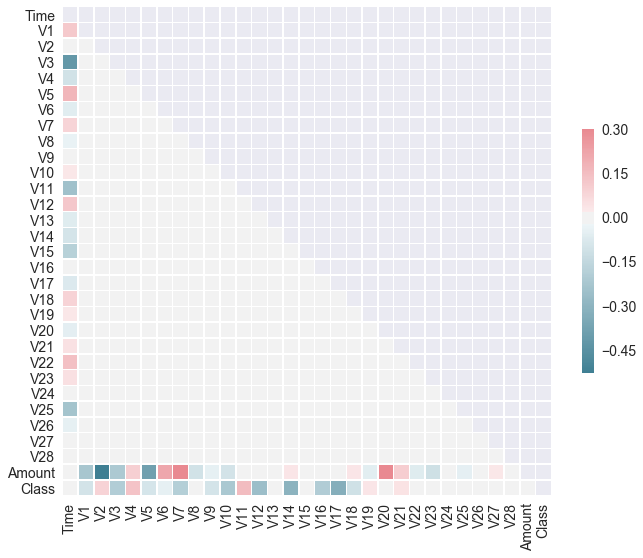

In [301]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

- 從上圖看起來，與Class最不相關的係數是：V8 V13 V15 V20 V22 V23 V24 V25 V26 V27 V28 Amount
- 但是相關性並不代表解釋性，因此尚須使用其他模型選擇features

# Data preparation

In [302]:
# Separate input features (X) and target variable (y)
y = df.Class
X = df.drop(['Class','Time','Amount'], axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

In [303]:
print( accuracy_score(pred_y_0, y) ) #accuracy超爆高

0.9991994578784932


In [304]:
print( np.unique( pred_y_0 ) )

[0 1]


In [305]:
len(pred_y_0)

284807

In [306]:
pred_y_0.sum() #只有348個被預測是1

348

## RFE logistic model選擇features

In [307]:
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False  True  True  True False False
  True  True False  True False False False False  True  True False False
 False False  True False]
[11 12 16  1  6  9 13  1  1  1 17 15  1  1  8  1 18 19 10  3  1  1  2  5
  7 14  1  4]


In [308]:
#select(4 8 9 10 13 14 16 21 22 27)

In [309]:
cols=["V4", "V8", 'V9', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V27'] 
X=df[cols]
y=df['Class']

In [310]:
X.head()

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27
0,1.378155,0.098698,0.363787,0.090794,-0.991390,-0.311169,-0.470401,-0.018307,0.277838,0.133558
1,0.448154,0.085102,-0.255425,-0.166974,0.489095,-0.143772,0.463917,-0.225775,-0.638672,-0.008983
2,0.379780,0.247676,-1.514654,0.207643,0.717293,-0.165946,-2.890083,0.247998,0.771679,-0.055353
3,-0.863291,0.377436,-1.387024,-0.054952,0.507757,-0.287924,-1.059647,-0.108300,0.005274,0.062723
4,0.403034,-0.270533,0.817739,0.753074,1.345852,-1.119670,-0.451449,-0.009431,0.798278,0.219422


In [311]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

#  Problem of imbalanced data

## Split trianing and testing data

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

## Imbalanced data results
- 若是在不選attribute的情況之下fit model 會導致 overfitting而且都預測為0

In [313]:
logreg = LogisticRegression()
lr = logreg.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [314]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[85292    15]
 [   55    81]]


Text(0.5,11,'Predicted label')

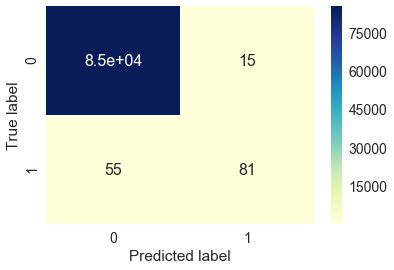

In [315]:
df_cm = pd.DataFrame(confusion_matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [316]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.84      0.60      0.70       136

avg / total       1.00      1.00      1.00     85443



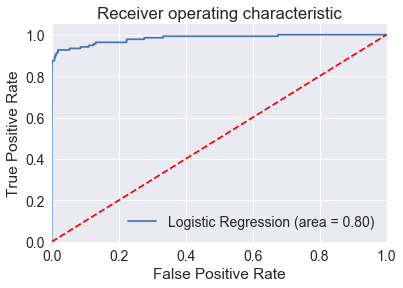

In [317]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

    - 由於資料本身非常不均勻，因此做出來的結果即使accuracy很高，真正預測為1的資料卻很少
    - 我們真正想要看預測出來為異常的資料是否正確
    - 以下定義recall, precision, f1 score：

$ Precision = \frac{TP}{TP+FP} \\ $ 預測為陽性的樣本中，有多少實際是陽性 <p>
$ Recall = \frac{TP}{TP+FN} \\ $ 陽性預測得到多少個陽性樣本→若要避免假陰性時，用這個度量會更好 <p>
$ F_1-score = 2*\frac{precision*recall}{precision+recall} \\ $

    - what we care about must be: recall and f1 score
    - Recall : 越高越好
    - f1-score : 越高越好，但同時可以取得recall & precision之平衡

    - 在極度不平衡的情況下，我們只能調整threshold去比較結果，但是發現不管怎麼調整，recall都還是很低
    - 因此我決定使用upsampling的方法來調整training data，再比較調整threshold之後的結果

In [318]:
y_score = lr.decision_function(X_test)

Text(0.5,1,'2-class Precision-Recall curve of Logistic Regression')

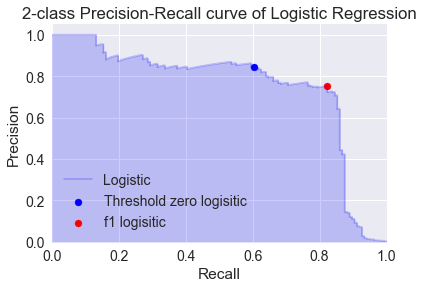

In [319]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

close_zero = np.argmin(np.abs(thresholds)) #train出來的那個點
f1=2*precision*recall/(precision+recall) #想找讓f1最大 取得recall precision平衡的點在哪
index=np.argmax(f1)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post',label='Logistic')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.scatter(recall[close_zero], precision[close_zero],c='b',marker='o',label='Threshold zero logisitic') #model train出來的
plt.scatter(recall[index], precision[index],c='r',marker='o',label='f1 logisitic') #我們想讓f1最大的點

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of Logistic Regression')

In [320]:
print(classification_report(y_test, lr.decision_function(X_test)>=thresholds[index] ) )

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.75      0.82      0.79       136

avg / total       1.00      1.00      1.00     85443



### Choose the best C

In [321]:
C_ = [0.01, 0.1, 1, 10, 100]
acc = []
for i in range(0,len(C_)) :
    logreg = LogisticRegression(C=C_[i])
    lr = logreg.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print('C = {:.2f}'.format(C_[i]))
    print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(lr.score(X_test, y_test)))
    y_score = lr.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    close_zero = np.argmin(np.abs(thresholds)) #auc最大時的threshold(f1=0.23 當前的)
    f1=2*precision*recall/(precision+recall)
    print('f1 = {:.4f}'.format(f1[close_zero]))
    print('recall = {:.2f}'.format(recall[close_zero]))
    print('precision = {:.2f}'.format(precision[close_zero]))
    acc.append(lr.score(X_test, y_test))
    print(' ')
    
print('The best C = {:.2f}'.format(C_[np.argmax(acc)]))

C = 0.01
Accuracy of logistic regression classifier on test set: 0.9991
f1 = 0.6484
recall = 0.52
precision = 0.86
 
C = 0.10
Accuracy of logistic regression classifier on test set: 0.9992
f1 = 0.6957
recall = 0.59
precision = 0.85
 
C = 1.00
Accuracy of logistic regression classifier on test set: 0.9992
f1 = 0.7039
recall = 0.60
precision = 0.85
 
C = 10.00
Accuracy of logistic regression classifier on test set: 0.9992
f1 = 0.7094
recall = 0.61
precision = 0.85
 
C = 100.00
Accuracy of logistic regression classifier on test set: 0.9992
f1 = 0.7064
recall = 0.61
precision = 0.84
 
The best C = 10.00


# Data Analysis: Up-sampling

- Up-sample Minority Class : logistic reg, random forest, xgboost(not done)

In [322]:
from sklearn.utils import resample
# Separate majority and minority classes
train =  pd.concat([X_train, y_train], axis=1)
df_majority = train[train['Class']==0]
df_minority = train[train['Class']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=int(len(train[train['Class']==0])),   # to match majority class
                                 random_state=15) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()

1    199008
0    199008
Name: Class, dtype: int64

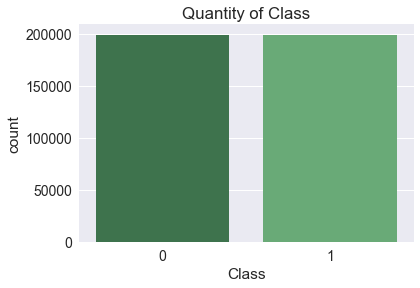

In [323]:
sns.countplot(x="Class", data=df_upsampled, palette="Greens_d").set_title("Quantity of Class");

In [324]:
len(train[train['Class']==0])*0.5

99504.0

In [325]:
df_upsampled.head()

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
12129,-0.856531,0.589308,1.080677,-0.469269,1.615885,2.014102,0.421301,-0.617125,-1.850871,-0.135056,0
190285,-1.469713,-0.076293,-1.303180,1.673588,0.324377,-0.307476,-0.315589,-0.025118,0.221877,0.008433,0
181456,-0.850307,-0.221967,-0.886381,0.436466,0.494355,-1.188291,1.205374,0.015432,0.044260,-0.030779,0
68319,1.628771,-0.210342,0.840897,-0.039582,-0.281048,-0.815819,0.237913,-0.688845,0.501168,0.557561,0
192016,-0.635749,0.236626,0.316659,-0.632573,1.876680,-0.525605,0.100075,0.268560,1.132095,0.027217,0


In [326]:
y_train = df_upsampled.Class
#X = df_upsampled.drop('Class', axis=1)
#cols=["V4", "V8", 'V9', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V27'] 
X_train = df_upsampled[cols]

## Logistic Regression

### 5-fold CV of tuning the best C

In [424]:
# Train model
lr_up = LogisticRegression()
lr_up.fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = lr_up.predict(X_test)

In [425]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)
C_ = [0.01, 0.1, 1, 10, 100]
mean_score = []

for i in range(0,len(C_)):
    lrr = LogisticRegression(C=C_[i])
    print('C = {}'.format(C_[i]))
    print('CV scores: \n{}'.format(cross_val_score(lrr,X_train, y_train, cv=kfold)))
    print('Mean of scores: {:.3f}'.format(cross_val_score(lrr,X_train, y_train, cv=kfold).mean()))
    mean_score.append(cross_val_score(lrr,X_train, y_train, cv=kfold).mean())
    print('')


print('The best C = {:.2f}'.format(C_[np.argmax(mean_score)]))

C = 0.01
CV scores: 
[0.938081   0.93736417 0.93727623 0.93721342 0.93681143]
Mean of scores: 0.937

C = 0.1
CV scores: 
[0.93804331 0.9372888  0.93722598 0.93720086 0.93673605]
Mean of scores: 0.937

C = 1
CV scores: 
[0.93805588 0.9372888  0.93721342 0.93720086 0.93674862]
Mean of scores: 0.937

C = 10
CV scores: 
[0.93805588 0.9372888  0.93720086 0.93720086 0.93674862]
Mean of scores: 0.937

C = 100
CV scores: 
[0.93805588 0.9372888  0.93720086 0.93720086 0.93674862]
Mean of scores: 0.937

The best C = 0.01


### Results of best C

[[83263  2044]
 [   13   123]]
Recall metric in the testing dataset:  0.9044117647058824
f1     score in the testing dataset:  0.10681719496309162
Accuracy in the testing set:  0.9759254707816907


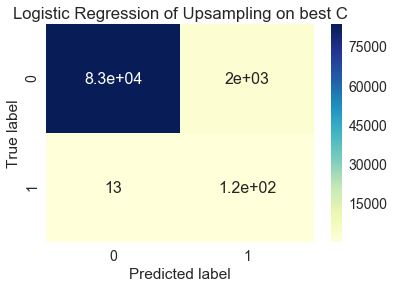

In [426]:
best_C = C_[np.argmax(mean_score)]
lr_up = LogisticRegression(C=best_C,class_weight='balanced')
lr_up.fit(X_train, y_train)
y_pred = lr_up.predict(X_test)

#y_score = lr_up.decision_function(X_test)
y_score = lr_up.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])

close_zero = np.argmin(np.abs(thresholds-0.5)) 
f1=2*precision*recall/(precision+recall)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
df_cm = pd.DataFrame(confusion_matrix, range(2),range(2))

sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu") # font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Logistic Regression of Upsampling on best C')

print("Recall metric in the testing dataset: ", confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1]))
print("f1     score in the testing dataset: ", f1[close_zero])
print("Accuracy in the testing set: ", lr_up.score(X_test, y_test) )

In [427]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_up.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [428]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85307
          1       0.06      0.90      0.11       136

avg / total       1.00      0.98      0.99     85443



- f score 只有0.11 很小 → 因為testing data還是嚴重imbalanced

threshold of best f1 : 0.993
threshold of train   : 0.500


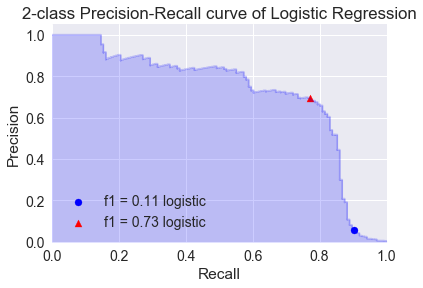

In [444]:
y_score = lr_up.predict_proba(X_test)[:,1]

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_score)

plt.step(recall_lr, precision_lr, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_lr, precision_lr, step='post', alpha=0.2,
                 color='b')


close_zero = np.argmin(np.abs(thresholds_lr-0.5)) #auc最大時的threshold(f1=0.23 當前的)
f1_lr=2*precision_lr*recall_lr/(precision_lr+recall_lr)
index_lr=np.argmax(f1_lr) #改成讓f1最大的threshold(之後享用的)

plt.scatter(recall_lr[close_zero], precision_lr[close_zero],c='b',marker='o',label='f1 = %.2f logistic' % f1_lr[close_zero])
plt.scatter(recall_lr[index_lr], precision_lr[index_lr],c='r',marker='^',label='f1 = %.2f logistic' % f1_lr[index_lr])


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of Logistic Regression')

print('threshold of best f1 : {:.3f}'.format(thresholds_lr[index_lr]))
print('threshold of train   : {:.3f}'.format(thresholds_lr[close_zero]))

In [445]:
thresholds_lr[index_lr]

0.9930361659092526

In [431]:
#print(classification_report(y_test, lr_up.decision_function(X_test)>=thresholds[index]))

In [432]:
print(classification_report(y_test, lr_up.predict_proba(X_test)[:,1]>=thresholds_lr[index_lr]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.70      0.77      0.73       136

avg / total       1.00      1.00      1.00     85443



In [447]:
lr_up.predict_proba(X_test)[:,1] >= thresholds_lr[index_lr]

array([False, False, False, ..., False, False, False])

In [446]:
thresholds_lr[index_lr]

0.9930361659092526

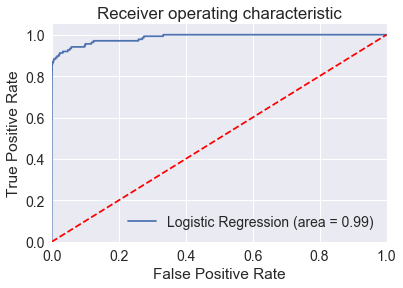

In [433]:
rf_roc_auc_lr = roc_auc_score(y_test, y_score)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_up.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc_lr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('LR_ROC')
plt.show()

### Best Parameter of LOG

- $ threshold = 0.993 \ $  is the best of Logistic which $ \ f_1=0.73, \ recall=0.77 $

## Random Forest

In [369]:
# Train model
rf = RandomForestClassifier(random_state=10,n_jobs=-1,max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

kfold = model_selection.KFold(n_splits=10, random_state=20)
modelRF = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelRF, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [370]:
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.99


Text(0.5,11,'Predicted label')

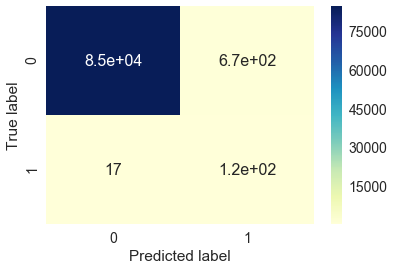

In [371]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [372]:
print(classification_report(y_test, y_pred)) #f1=0.85

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85307
          1       0.15      0.88      0.26       136

avg / total       1.00      0.99      0.99     85443



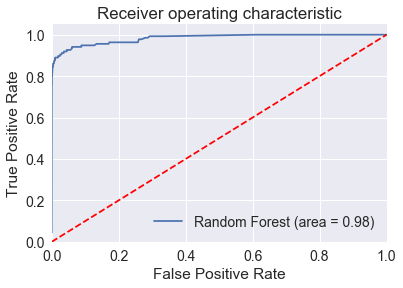

In [373]:
rf_roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % rf_roc_auc_rf)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve of Random Forest')

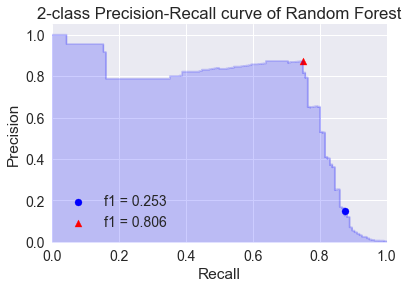

In [374]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.step(recall_rf, precision_rf, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2,
                 color='b')

close_zero = np.argmin(np.abs(thresholds_rf-0.5)) #auc最大時的threshold(f1=0.23 當前的)
f1_rf=2*precision_rf*recall_rf/(precision_rf+recall_rf)
index_rf=np.argmax(f1_rf) #改成讓f1最大的threshold(之後享用的)

plt.scatter(recall_rf[close_zero], precision_rf[close_zero],c='b',marker='o',label='f1 = %.3f' % f1_rf[close_zero])
plt.scatter(recall_rf[index_rf], precision_rf[index_rf],c='r',marker='^',label='f1 = %.3f' % f1_rf[index_rf])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of Random Forest')

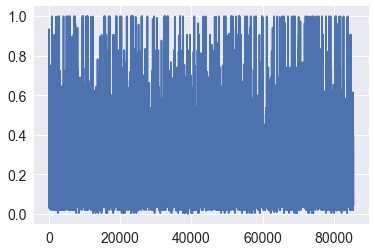

In [375]:
plt.plot(rf.predict_proba(X_test)[:,1])

In [376]:
f1_rf=2*precision_rf*recall_rf/(precision_rf+recall_rf)
index_rf=np.argmax(f1_rf)

Text(0.5,1,'2-class Precision-Recall curve of Random Forest')

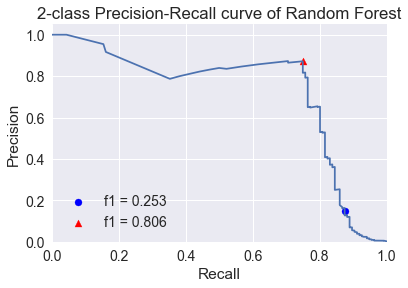

In [377]:
close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(recall_rf, precision_rf)
plt.scatter(recall_rf[close_default_rf], precision_rf[close_default_rf],c='b',label='f1 = %.3f ' % f1_rf[close_zero])
plt.scatter(recall_rf[index_rf], precision_rf[index_rf],c='red',marker='^',label='f1 = %.3f ' % f1_rf[index_rf])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of Random Forest')

In [351]:
len(thresholds_rf)

2641

In [352]:
thresholds_rf[index_rf]

0.9738410846927892

In [378]:
(rf.predict_proba(X_test)[:,1]>=thresholds_rf[index_rf]).astype(int)
print(classification_report(y_test, rf.predict_proba(X_test)[:,1]>=thresholds_rf[index_rf]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.87      0.75      0.81       136

avg / total       1.00      1.00      1.00     85443



### Best Parameter of RF

- $ threshold = 0.973 \ $  is the best of RF which $ \ f_1=0.81, \ recall=0.75 $

## XGBoost

In [379]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [380]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.1,  # the training step for each iteration
    'silent': 0,  # logging mode - quiet
    'objective': "binary:logistic",  # error evaluation for multiclass training
    'subsample': 0.7,
    'colsample_bytree':0.7,
    'scale_pos_weight':2
}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [381]:
bst = xgb.train(param, dtrain, num_round)

In [382]:
preds = bst.predict(dtest)

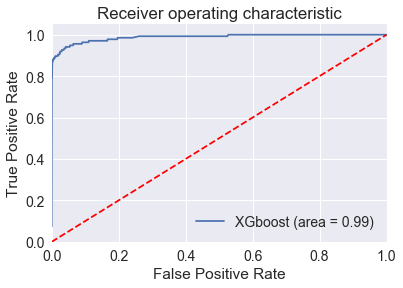

In [383]:
rf_roc_auc_xg = roc_auc_score(y_test, preds)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr_xg, tpr_xg, label='XGboost (area = %0.2f)' % rf_roc_auc_xg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGboost_ROC')
plt.show()

Text(0.5,11,'Predicted label')

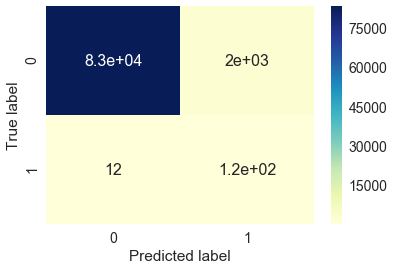

In [384]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, (preds > .5).astype(int))
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [385]:
print(classification_report(y_test, (preds > .5).astype(int)))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85307
          1       0.06      0.91      0.11       136

avg / total       1.00      0.98      0.99     85443



Text(0.5,1,'2-class Precision-Recall curve of XGBoost')

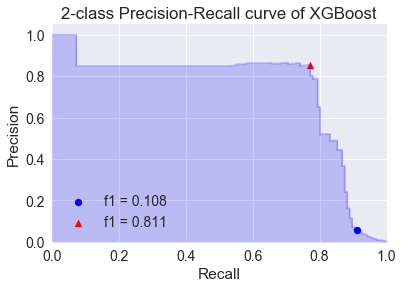

In [387]:
precision_xg, recall_xg, thresholds_xg = precision_recall_curve(y_test, preds)

plt.step(recall_xg, precision_xg, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_xg, precision_xg, step='post', alpha=0.2,
                 color='b')

close_zero = np.argmin(np.abs(thresholds_xg-0.5)) 
f1_xg=2*precision_xg*recall_xg/(precision_xg+recall_xg)
index_xg=np.argmax(f1_xg)

plt.scatter(recall_xg[close_zero], precision_xg[close_zero],c='b',marker='o',label='f1 = %.3f' % f1_xg[close_zero])
plt.scatter(recall_xg[index_xg], precision_xg[index_xg],c='r',marker='^',label='f1 = %.3f' % f1_xg[index_xg])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of XGBoost')

In [389]:
thresholds_xg[index_xg]

0.91771823

In [390]:
thresholds_xg[close_zero]

0.5000058

In [392]:
print(classification_report(y_test, preds>=thresholds_xg[index_xg]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.85      0.77      0.81       136

avg / total       1.00      1.00      1.00     85443



In [198]:
max(preds)

0.93371266

### Best Parameter of XGBoost

- $ threshold = 0.9177 \ $  is the best of XGBoost which $ \ f_1=0.81, \ recall=0.77 $

## Results Comparison
    - Logistic Regression: C=0.01, threshold= 0.993 →f1=0.73
    - Random Forest: thereshold = 0.5 →f1=0.87
    - XGBoost: threshold=0.9 →f1=0.8


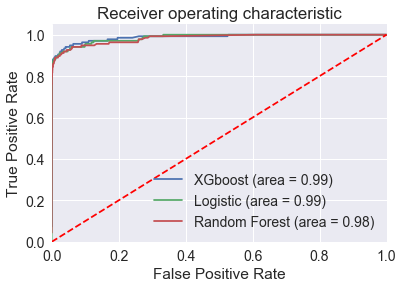

In [394]:
#rf_roc_auc_xg = roc_auc_score(y_test, (preds>=thresholds_xg[index]).astype(int))
#fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, preds>=thresholds_xg[index])
plt.figure()
plt.plot(fpr_xg, tpr_xg, label='XGboost (area = %0.2f)' % rf_roc_auc_xg)
plt.plot(fpr_lr, tpr_lr, label='Logistic (area = %0.2f)' % rf_roc_auc_lr, c='C1')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % rf_roc_auc_rf, c='C2')


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('XGboost_ROC')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve')

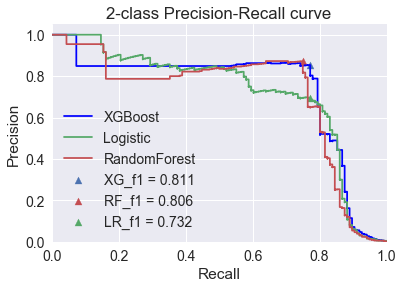

In [409]:
plt.step(recall_xg, precision_xg, color='b',
         where='post',label='XGBoost')
plt.step(recall, precision, c='C1',
         where='post',label='Logistic')
plt.step(recall_rf, precision_rf, c='C2',
         where='post',label='RandomForest')

plt.scatter(recall_xg[index_xg], precision_xg[index_xg],marker='^',label='XG_f1 = %.3f' % f1_xg[index_xg])
plt.scatter(recall_rf[index_rf], precision_rf[index_rf],c='C2',marker='^',label='RF_f1 = %.3f' % f1_rf[index_rf])
plt.scatter(recall_lr[index_lr], precision_lr[index_lr],c='C1',marker='^',label='LR_f1 = %.3f' % f1_lr[index_lr])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve')

## Voting: Logistic Regression, RF, XGBoost

In [491]:
pred_lr = (lr_up.predict_proba(X_test)[:,1] >= 0.9).astype(int)
pred_rf = (rf.predict_proba(X_test)[:,1]>=0.9).astype(int)
pred_xg = (preds>=0.9).astype(int)

In [492]:
summ = np.column_stack((pred_lr,pred_rf,pred_xg))
summ

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [493]:
summ = np.sum(summ, axis=1)

In [494]:
len(summ)

85443

In [495]:
ans = []
for i in range(0,len(summ)) :
    if summ[i] >= 2:
        ans.append(1)
    else:
        ans.append(0)

In [497]:
print(classification_report(y_test, ans))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.73      0.80      0.76       136

avg / total       1.00      1.00      1.00     85443



In [500]:
accuracy_score(y_test, ans)

0.999204147794436

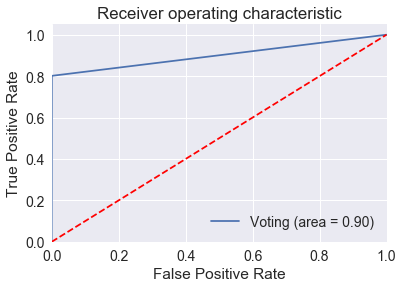

In [498]:
rf_roc_auc = roc_auc_score(y_test, )
fpr, tpr, thresholds = roc_curve(y_test, ans)
plt.figure()
plt.plot(fpr, tpr, label='Voting (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Voting_ROC')
plt.show()

In [416]:
np.column_stack((pred_lr, pred_rf, pred_xg))

array([[0.01403602, 0.04781671, 0.07704531],
       [0.43316557, 0.31450795, 0.36137792],
       [0.10091164, 0.04781671, 0.13796894],
       ...,
       [0.17470235, 0.25175405, 0.29949406],
       [0.0469642 , 0.04781671, 0.10424204],
       [0.31940089, 0.05286923, 0.15018117]])

In [200]:
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier  

In [468]:
clf = XGBClassifier(  
    silent=0,
    eta= 0.1, # 如同学习率  
    max_depth=4, # 构建树的深度，越大越容易过拟合  
    subsample=0.7, # 随机采样训练样本 训练实例的子采样比  
    colsample_bytree=0.7, # 生成树时进行的列采样   
    objective= "binary:logistic", #多分类的问题 指定学习任务和相应的学习目标
    )  

voting = VotingClassifier(
    estimators=[('lr', lr_up), ('rf', rf), ('gnb', clf)],
    voting='soft', 
    weights=[1,3,3],
    flatten_transform=True)

vt = voting.fit(X_train, y_train)

C:\Users\hellojoyee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0.5,11,'Predicted label')

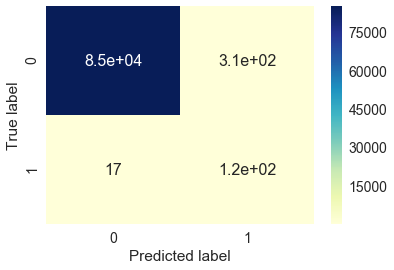

In [473]:
y_pred = vt.predict(X_test)
y_score = vt.predict_proba(X_test)[:,1]
from sklearn.metrics import confusion_matrix
# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
from sklearn.metrics import confusion_matrix
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [474]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.28      0.88      0.42       136

avg / total       1.00      1.00      1.00     85443



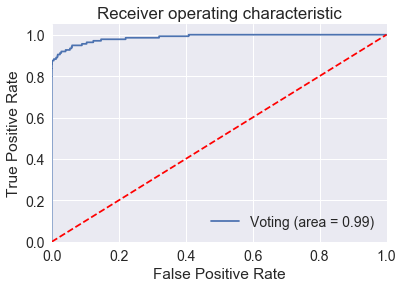

In [477]:
rf_roc_auc = roc_auc_score(y_test, y_score)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.figure()
plt.plot(fpr, tpr, label='Voting (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Voting_ROC')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve of Voting')

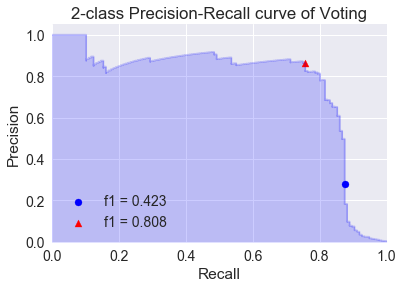

In [478]:
precision_vt, recall_vt, thresholds_vt = precision_recall_curve(y_test, y_score)

plt.step(recall_vt, precision_vt, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_vt, precision_vt, step='post', alpha=0.2,
                 color='b')

close_zero = np.argmin(np.abs(thresholds_vt-0.5)) 
f1=2*precision_vt*recall_vt/(precision_vt+recall_vt)
index=np.argmax(f1)

plt.scatter(recall_vt[close_zero], precision_vt[close_zero],c='b',marker='o',label='f1 = %.3f' % f1[close_zero])
plt.scatter(recall_vt[index], precision_vt[index],c='r',marker='^',label='f1 = %.3f' % f1[index])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of Voting')

In [476]:
print(classification_report(y_test, y_score>thresholds_vt[index]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.86      0.75      0.80       136

avg / total       1.00      1.00      1.00     85443



# Conclusion

# Data Analysis: Down-sampling 
- logitstic reg, random forest, SVM

In [502]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(train[train['Class']==1]),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
  
# Display new class counts
df_downsampled.Class.value_counts()

1    356
0    356
Name: Class, dtype: int64

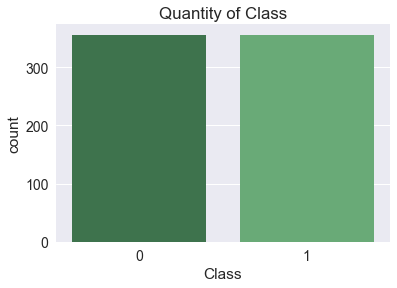

In [527]:
sns.countplot(x="Class", data=df_downsampled, palette="Greens_d").set_title("Quantity of Class");

In [528]:
df_downsampled.head()

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
56879,2.799128,0.020329,-0.150514,0.492527,0.799005,-0.479762,0.310987,0.105899,0.501577,0.033879,0
206063,-0.608138,-0.271845,0.046479,-0.164771,0.582229,-0.072439,-0.116537,-0.285921,-0.547252,0.379375,0
135892,-0.079166,1.384499,0.152787,-0.204262,-0.386206,0.611565,0.157142,-0.222762,-0.569381,0.269799,0
31101,1.148900,-0.129061,-0.543646,0.142691,0.565171,0.540469,0.331041,-0.369256,-1.291568,-0.002721,0
104243,-1.780242,-0.052149,-2.185475,1.547314,1.881627,-0.437248,0.266878,-0.472917,-1.011895,0.036366,0


In [529]:
199008/356

559.0112359550562

y_train = df_downsampled.Class
#X = df_upsampled.drop('Class', axis=1)
#cols=["V4", "V8", 'V9', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V27'] 
X_train = df_downsampled[cols]

In [530]:
X_train = df_downsampled[cols]
y_train = df_downsampled.Class

## Logistic Regression

In [531]:
# Train model
logreg_down = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = logreg_down.predict(X_test)

# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1) )

[0 1]
0.9675573189143639


In [532]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg_down.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_down.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.94
Accuracy of logistic regression classifier on test set: 0.97


In [533]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_y_1)
print(confusion_matrix)

[[82547  2760]
 [   12   124]]


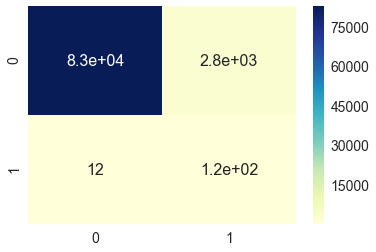

In [534]:
df_cm = pd.DataFrame(confusion_matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size

In [535]:
print(classification_report(y_test, pred_y_1))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85307
          1       0.04      0.91      0.08       136

avg / total       1.00      0.97      0.98     85443



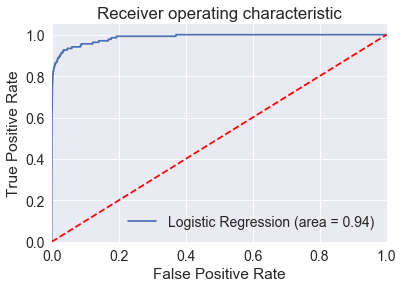

In [511]:
logit_roc_auc = roc_auc_score(y_test, logreg_down.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_down.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve of Logistic Regression')

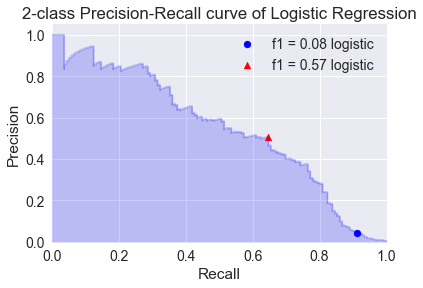

In [512]:
y_score = logreg_down.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

close_zero = np.argmin(np.abs(thresholds))

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

f1=2*precision*recall/(precision+recall)
index=np.argmax(f1) #改成讓f1最大的threshold(之後享用的)

plt.scatter(recall[close_zero], precision[close_zero],c='b',marker='o',label='f1 = %.2f logistic' % f1[close_zero])
plt.scatter(recall[index], precision[index],c='r',marker='^',label='f1 = %.2f logistic' % f1[index])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of Logistic Regression')

In [513]:
print(classification_report(y_test, logreg_down.decision_function(X_test)>=thresholds[index]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.51      0.65      0.57       136

avg / total       1.00      1.00      1.00     85443



### 5-fold CV of tuning the best C

In [228]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)
C_ = [0.01, 0.1, 1, 10, 100]
mean_score = []

for i in range(0,len(C_)):
    lrr = LogisticRegression(C=C_[i])
    print('C = {}'.format(C_[i]))
    print('CV scores: \n{}'.format(cross_val_score(lrr,X_train, y_train, cv=kfold)))
    print('Mean of scores: {:.3f}'.format(cross_val_score(lrr,X_train, y_train, cv=kfold).mean()))
    mean_score.append(cross_val_score(lrr,X_train, y_train, cv=kfold).mean())
    print('')


print('The best C = {:.2f}'.format(C_[np.argmax(mean_score)]))

C = 0.01
CV scores: 
[0.93706294 0.86713287 0.94366197 0.92957746 0.92957746]
Mean of scores: 0.921

C = 0.1
CV scores: 
[0.9020979  0.91608392 0.95774648 0.94366197 0.95070423]
Mean of scores: 0.934

C = 1
CV scores: 
[0.9020979  0.92307692 0.95774648 0.94366197 0.95774648]
Mean of scores: 0.937

C = 10
CV scores: 
[0.9020979  0.90909091 0.95070423 0.94366197 0.95774648]
Mean of scores: 0.933

C = 100
CV scores: 
[0.9020979  0.90909091 0.95070423 0.94366197 0.95774648]
Mean of scores: 0.933

The best C = 1.00


### Compare different threshold

## Random Forest

In [536]:
# Train model
rf_down = RandomForestClassifier(random_state=10).fit(X_train, y_train)

In [537]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_down.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_down.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.98


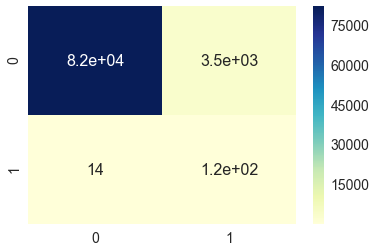

In [538]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size

In [539]:
y_pred = rf_down.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85307
          1       0.06      0.91      0.12       136

avg / total       1.00      0.98      0.99     85443



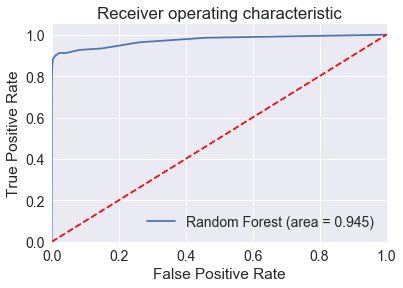

In [540]:
rf_roc_auc = roc_auc_score(y_test, rf_down.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_down.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve of Random Forest')

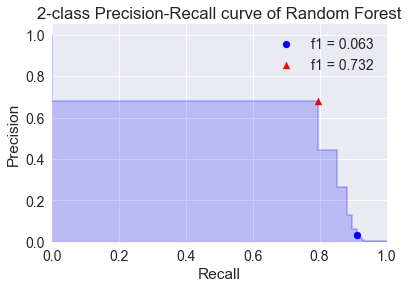

In [541]:
precision_rf2, recall_rf2, thresholds_rf2 = precision_recall_curve(y_test, rf_down.predict_proba(X_test)[:,1])

plt.step(recall_rf2, precision_rf2, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_rf2, precision_rf2, step='post', alpha=0.2,
                 color='b')

close_zero = np.argmin(np.abs(thresholds_rf2-0.5)) #auc最大時的threshold(f1=0.08 當前的)
f1=2*precision_rf2*recall_rf2/(precision_rf2+recall_rf2)
index=np.argmax(f1) #改成讓f1最大的threshold(之後享用的)

plt.scatter(recall_rf2[close_zero], precision_rf2[close_zero],c='b',marker='o',label='f1 = %.3f' % f1[close_zero])
plt.scatter(recall_rf2[index], precision_rf2[index],c='r',marker='^',label='f1 = %.3f' % f1[index])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of Random Forest')

In [542]:
print(classification_report(y_test, rf_down.predict_proba(X_test)[:,1]>= thresholds_rf2[index]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.68      0.79      0.73       136

avg / total       1.00      1.00      1.00     85443



## SVM

In [543]:
from sklearn import svm
svm_down = svm.SVC().fit(X_train, y_train)

In [544]:
y_pred = svm_down.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_down.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.96


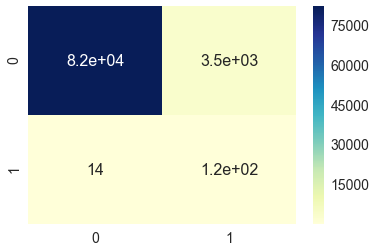

In [545]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size

In [546]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85307
          1       0.03      0.90      0.07       136

avg / total       1.00      0.96      0.98     85443



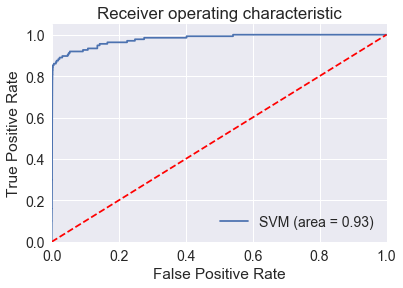

In [547]:
rf_roc_auc = roc_auc_score(y_test, svm_down.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svm_down.decision_function(X_test))
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve of SVM')

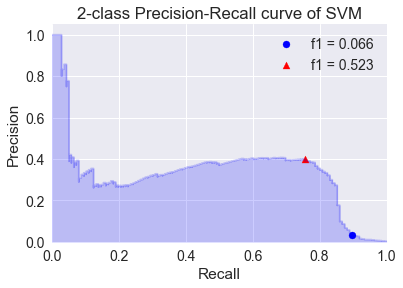

In [548]:
y_score = svm_down.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

close_zero = np.argmin(np.abs(threshold)) #auc最大時的threshold(f1=0.08 當前的)
f1=2*precision*recall/(precision+recall)
index=np.argmax(f1) #改成讓f1最大的threshold(之後享用的)

plt.scatter(recall[close_zero], precision[close_zero],c='b',marker='o',label='f1 = %.3f' % f1[close_zero])
plt.scatter(recall[index], precision[index],c='r',marker='^',label='f1 = %.3f' % f1[index])


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='best')
plt.title('2-class Precision-Recall curve of SVM')

In [549]:
print(classification_report(y_test, svm_down.decision_function(X_test)>=threshold[index]))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.40      0.76      0.52       136

avg / total       1.00      1.00      1.00     85443



### Results comments
    - down sampling 的方法比upsampling差，因為只做一次，資訊少了很多，導致預測結果很差
    - 接下來down sampling 想要使用 ensemble 的方法，把所有多的點分成n份

### Ensemble down-sampling

In [318]:
len(df_majority)/len(df_minority) #要把多的分成559份 每份有356個data

559.0112359550562

In [340]:
from sklearn.model_selection import KFold
tt = range(0,len(df_majority)+1)
kf = KFold(n_splits=559) #要抽幾次

ft = df_majority[cols].as_matrix()
ylabel = df_majority.Class.as_matrix()

for others, take in kf.split(tt):
    #print("TRAIN:", others, "TEST:", take)
    X_train_en = ft[take-1]
    y_train_en = ylabel[take-1]
    #lr_en = LogisticRegression().fit(X_train_en,y_train_en)
    lr_en = LogisticRegression().fit(X_train_en, y_train_en)
    lr_en_pred = lr_en.predict(X_test)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [334]:
dic = {model1 : value1, key2 : value2 }

TypeError: 'generator' object cannot be interpreted as an integer

TypeError: unhashable type: 'numpy.ndarray'

In [293]:
print(skf)


StratifiedKFold(n_splits=559, random_state=None, shuffle=False)


In [294]:
for train_index, test_index in skf.split(df_majority[cols], df_majority['Class']):
    print("TRAIN:", train_index, "TEST:", test_index)
    majority_train, majority_test = df_majority[cols][train_index], df_majority[cols][test_index]
    y_train, y_test = y[train_index], y[test_index]

TypeError: 'StratifiedKFold' object does not support indexing

In [286]:
r[]

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])